### Distribución Triangular

#### Utilizando la distribución uniforme 

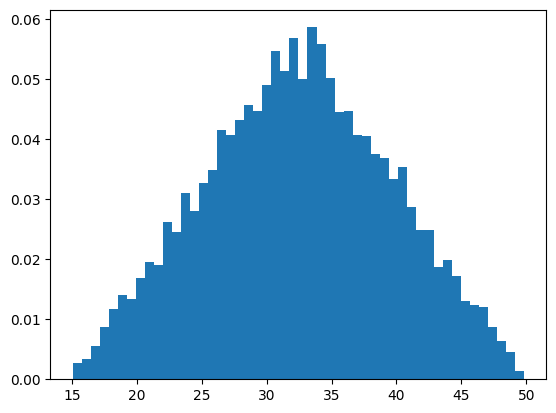

<Figure size 1000x500 with 0 Axes>

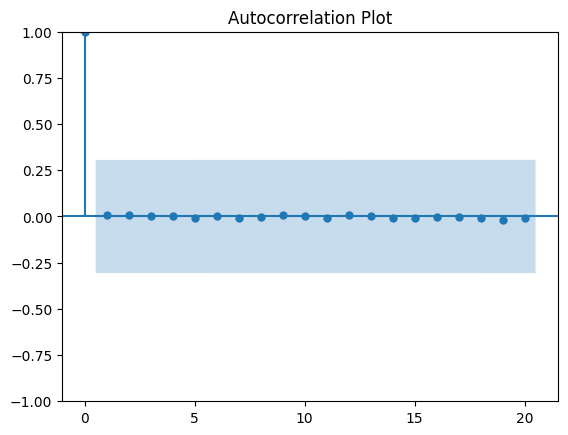

In [17]:
import math as math
import numpy as np
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf

#Creamos la funcion de la inversa. Recibe R_i que es un vector de variables aleatorias uniformes
def inversa_tran_triang(n, a, b, c, R_i):
    res = []
    for R in R_i:
        #Dividimos el caso entre los dos intervalos y calculamos el que corresponda
        if R < (c - a) / (b - a):
            x_i = a + math.sqrt(R * (b - a) * (c - a))
            res.append(x_i)
        else:
            x_i = b - math.sqrt((1 - R) * (b - a) * (b - c))
            res.append(x_i)
    return res


#Creamos 10.000 variables aleatorias uniformes
n=10000
random.seed(42)
variables_uniformes=np.random.uniform(0,1,n)
a=15
b=50
c=32

#LLamamos la funicón y graficamos
variables_triangulares=inversa_tran_triang(n,a,b,c,variables_uniformes)
plt.hist(variables_triangulares, bins=50, density=True)


#Hacemos la gráfica de la autocorrelación
autocorrelation = acf(variables_triangulares)

plt.figure(figsize=(10, 5))
sm.graphics.tsa.plot_acf(autocorrelation, lags=20, title='Autocorrelation Plot')
plt.show()


## Prueba de Bondad de Ajuste Chi cuadrado

In [65]:
import numpy as np
from scipy.stats import triang, chisquare

# Your observed data in the variables_triangulares variable
triangular_observed = variables_triangulares

# Parameters of the triangular distribution
c = 32  # Mode
a = 15  # Minimum
b = 50  # Maximum
n = len(triangular_observed)

# Creamos la distribucion triangular con los parametros dados
triangular_dist = triang(c=(c - a) / (b - a), loc=a, scale=b - a)

# Generamos la distribución teórica
theoretical_data = triangular_dist.rvs(size=n)

# Normalizamos los datos par que la probabilidad sume a 1
observed_data = triangular_observed / np.sum(triangular_observed)
theoretical_data = theoretical_data / np.sum(theoretical_data)

# test chi cuadrado
chi_square, p_value = chisquare(f_obs=observed_data, f_exp=theoretical_data)

print(f"Valor de chi-cuadrado: {chi_square}")
print(f"Valor p: {p_value}")

if p_value < 0.05:
    print("Los datos no se ajustan a la distribución triangular.")
else:
    print("Los datos se ajustan a la distribución triangular.")




Valor de chi-cuadrado: 0.10771976453909181
Valor p: 1.0
Los datos se ajustan a la distribución triangular.


(array([0.00144518, 0.00448006, 0.00838205, 0.00939368, 0.00896012,
        0.01474085, 0.01806476, 0.01777573, 0.02066609, 0.0231229 ,
        0.02731392, 0.02485712, 0.03179399, 0.02818103, 0.03439531,
        0.04104315, 0.04046507, 0.04480062, 0.04610128, 0.04682387,
        0.05014779, 0.04552321, 0.051882  , 0.05722917, 0.05563948,
        0.0510149 , 0.05462785, 0.05072586, 0.04480062, 0.04349995,
        0.04364447, 0.03771923, 0.03786375, 0.03425079, 0.03685212,
        0.03164947, 0.02832555, 0.02543519, 0.02644682, 0.02456808,
        0.02283386, 0.02008802, 0.01806476, 0.01647507, 0.01401826,
        0.011995  , 0.00765946, 0.00549169, 0.00289036, 0.00101163]),
 array([15.23187292, 15.92382768, 16.61578244, 17.3077372 , 17.99969196,
        18.69164672, 19.38360148, 20.07555624, 20.767511  , 21.45946576,
        22.15142052, 22.84337528, 23.53533004, 24.2272848 , 24.91923956,
        25.61119432, 26.30314908, 26.99510384, 27.6870586 , 28.37901336,
        29.07096812, 29.76

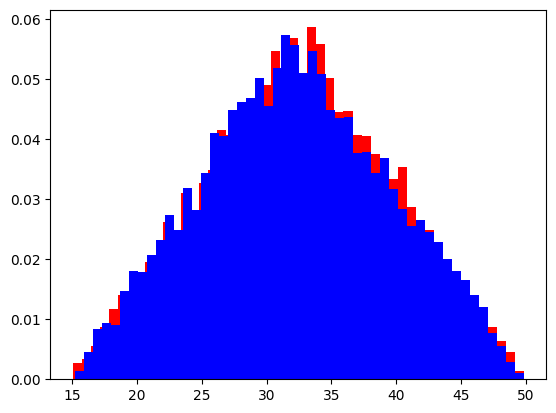

In [73]:
plt.hist(variables_triangulares, bins=50, density=True,color='red')
plt.hist(Teorical, bins=50, density=True,color='blue')
